# Código para previsão de maré meteorólogica para Rio de Janeiro
## Baixando dados de maré em Imbituba pelo site da UNESCO/GOOS

In [121]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
  
def mareGOOS():
    # trinta dias >> period=30 (incluir como variável de input)
    url= 'http://www.ioc-sealevelmonitoring.org/bgraph.php?code=imbi&output=tab&period=30'
    resp=requests.get(url)
    
    if resp.status_code == 200:
        print("A página foi aberta com sucesso!!")
        print("A série de maré segue a baixo: \n")
        SerieMare = BeautifulSoup(resp.text,'html.parser')
        table = SerieMare.find(name='table')
        df_full = pd.read_html(str(table))[0].head(43150) # melhorar isso
        print(df_full)
        return df_full
    
    else:
        print("Falha no acesso a página!")

sig_mare0 = mareGOOS()


A página foi aberta com sucesso!!
A série de maré segue a baixo: 

                         0       1       2
0               Time (UTC)  prs(m)  rad(m)
1      2022-09-18 23:42:00    2.16  -2.313
2      2022-09-18 23:43:00    2.33  -2.249
3      2022-09-18 23:44:00    2.24  -2.411
4      2022-09-18 23:45:00    2.22  -2.493
...                    ...     ...     ...
43139  2022-10-18 23:10:00    2.37  -2.188
43140  2022-10-18 23:11:00    2.35  -2.141
43141  2022-10-18 23:12:00    2.41  -2.178
43142  2022-10-18 23:13:00    2.35  -2.109
43143  2022-10-18 23:14:00     2.4  -2.147

[43144 rows x 3 columns]


## Tratamento 'improvisado' dos dados (melhorar...)

In [78]:
sig_mare01 = sig_mare0.dropna() # na versão final isso não poderá acontecer!
sig_mare1 = np.array(sig_mare01[1])
sig_mare2 = sig_mare1[1:].astype(np.float)
sig_mare = sig_mare2 - np.mean(sig_mare2)

## Filtrando altas frequências não meteorológicas (1/44.2h)

In [119]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

sig_fft = fftpack.fft(sig_mare)
time_step = 1./60.
peak_freq = 1./44.2 # frequência de corte definida na Tese do Prof. ELoi
sample_freq = fftpack.fftfreq(sig_mare.size, d=time_step)
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)
time_vec = np.arange(0,43059) # melhorar isso
time_vec1 = np.arange(0,43059)# melhorar isso

## Serie medida vs. filtrada

C:\Users\Marcelo\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


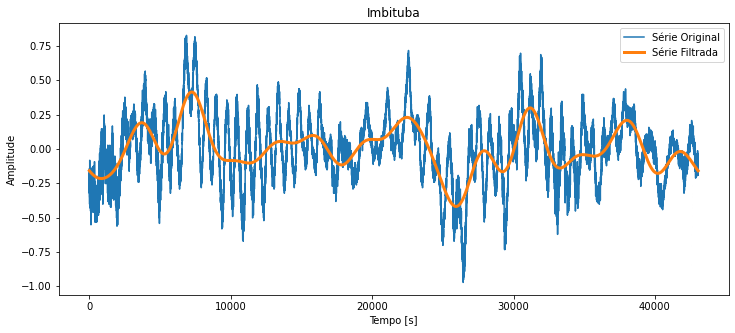

In [125]:
plt.figure(figsize=(12, 5))
plt.plot(time_vec, sig_mare, label='Série Original')
plt.plot(time_vec1, filtered_sig, linewidth=3, label='Série Filtrada')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.title('Imbituba')

plt.legend(loc='best')

# Previsão de maré meteorológica para o Rio pelo método do Prof. Eloi Melo Filho (2017)

In [126]:
t=8000 #instante do tempo em segundos -- melhorar isso
RioMareMeteo = 0.726*filtered_sig[t] # 
print('Maré meteorológica em Imbituba no instante t: '+ "{:.2f}".format(filtered_sig[t].real) +' m')
print('Maré meteorológica no Rio (26h depois): '+"{:.2f}".format(RioMareMeteo.real)+' m')


Maré meteorológica em Imbituba no instante t: 0.27 m
Maré meteorológica no Rio (26h depois): 0.19 m
